In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# viz
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import zipfile

# Read in the Data
We choose to analyze the entire 2022 Bicyclistic dataset. 

In [2]:
datasets_dir = "C:/Users/vluon/Desktop/Math and Science/Data-Analysis-on-Bike-Sharing-Data/cycle_data/"
dataset_by_year = {}

for year in ["2022"]: # 2021 will be for later, ML stuff
    dfs = [] # to aggregate all the data for year
    # read in each month for year
    for i in range(1, 12+1):
        print(f"Reading in {year}, month {i}")
        i = f"0{i}" if i < 10 else f"{i}"    
        zf = zipfile.ZipFile(datasets_dir + year + f'/{year}{i}-divvy-tripdata.zip')
        dfs.append(pd.read_csv(zf.open(f'{year}{i}-divvy-tripdata.csv')))
    dataset_by_year[year] = pd.concat(dfs)

dataset_by_year["2022"].head()

Reading in 2022, month 1
Reading in 2022, month 2
Reading in 2022, month 3
Reading in 2022, month 4
Reading in 2022, month 5
Reading in 2022, month 6
Reading in 2022, month 7
Reading in 2022, month 8
Reading in 2022, month 9
Reading in 2022, month 10
Reading in 2022, month 11
Reading in 2022, month 12


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


# Data Cleaning
In this section, we check: 
* consistent data types, 
* typos/formatting errors in the values or attributes, 
* duplicates, 
* missing values, 
* outliers,
* data validation

**Validate data types**: We use df.info() to get a read of the datatypes in each column, and convert the "started_at" and "ended_at" columns to datetime objects. 

In [3]:
df_22 = dataset_by_year["2022"]
df_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5667717 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 605.4+ MB


**Checking missing values**

In [4]:
df_22[df_22.isnull().any(axis=1)].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
256,857B71104B437577,electric_bike,2022-01-04 17:08:16,2022-01-04 17:12:15,NaN,NaN,Lockwood Ave & Wrightwood Ave,312,41.930000,-87.760000,41.930000,-87.7600,casual
510,88276B47FFBB9910,electric_bike,2022-01-25 07:39:35,2022-01-25 07:41:01,Larrabee St & Kingsbury St,TA1306000009,NaN,NaN,41.897632,-87.643388,41.900000,-87.6400,member
512,1B66EC28DD618680,electric_bike,2022-01-21 14:26:57,2022-01-21 14:32:17,Central Park Ave & Ohio St,369,NaN,NaN,41.890000,-87.720000,41.900000,-87.7100,member
979,565EEF32A9B65000,electric_bike,2022-01-11 21:51:25,2022-01-11 21:55:27,NaN,NaN,Ashland Ave & Grace St,13319,41.950000,-87.650000,41.950687,-87.6687,member
980,C1C1910260144C76,electric_bike,2022-01-05 03:25:22,2022-01-05 03:43:32,NaN,NaN,Ashland Ave & Grace St,13319,41.920000,-87.690000,41.950687,-87.6687,member


In [5]:
df_22.isnull().sum()
# We find no critical missing information. 

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

**Creating new attributes**

In [6]:
# Constants/Helpers
def get_day(k: int, long: bool = False) -> str:
    # Type checks
    if not isinstance(k, int):
        raise TypeError("Parameter 'k' must be an integer. ")
    elif not isinstance(long, bool):
        raise TypeError("Parameter 'long' must be a boolean. ")

    return {
            1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday", 7: "Sunday"
        }[k] if long else {
            1: "Mon", 2: "Tue", 3: "Wed", 4: "Thur", 5: "Fri", 6: "Sat", 7: "Sun"
        }[k]

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
# Create a 'duration' column next to start & end date/time columns
df_22["started_at"] = pd.to_datetime(df_22["started_at"])
df_22["ended_at"] = pd.to_datetime(df_22["ended_at"])
df_22["duration"] = df_22["ended_at"] - df_22["started_at"]

# Create month & day of week columns next to duration column
df_22["day_of_week"] = df_22["started_at"].dt.day_of_week + 1
df_22["day_of_week_str"] = (df_22["day_of_week"]).apply(get_day, long=False)
df_22["month"] = df_22["started_at"].dt.month

df_22 = df_22[["ride_id", "rideable_type", "started_at", "ended_at", "duration", "day_of_week", "day_of_week_str", "month", "start_station_name","start_station_id",	"end_station_name",	"end_station_id", "start_lat", "start_lng", "end_lat", "end_lng", "member_casual"]] 

In [8]:
# More attributes, appended to end

# Create a month column 
df_22["month"] = df_22["started_at"].dt.month

# Create an hour column
df_22["hour"] = df_22["started_at"].dt.hour

**Validating numeric ranges**

In [9]:
# Get rid of zero or negative length rides.
print("Num of non-positive durations:", df_22[df_22["duration"].dt.total_seconds() <= 0].shape[0]) 
df_22 = df_22.drop(df_22[df_22["duration"].dt.total_seconds() <= 0].index)

Num of non-positive durations: 531


In [10]:
# Make sure all rides are started in the correct month and year, and a sensical day
print("Unique start and end months:", df_22["started_at"].dt.month.unique(), df_22["ended_at"].dt.month.unique())
print("Unique start and end years:", df_22["started_at"].dt.year.unique(), df_22["ended_at"].dt.year.unique())
print("Min and Max start and end dates:", df_22["started_at"].dt.day.min(), df_22["started_at"].dt.day.max(), df_22["ended_at"].dt.day.min(), df_22["ended_at"].dt.day.max())

Unique start and end months: [ 1  2  3  4  5  6  7  8  9 10 11 12] [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique start and end years: [2022] [2022 2023]
Min and Max start and end dates: 1 31 1 31


In [11]:
# Make sure lower and upper bounds of start and end coordinates make sense
df_22[["start_lat", "start_lng", "end_lat", "end_lng"]].describe().loc[["min", "max"]]

,start_lat,start_lng,end_lat,end_lng
min,41.640,-87.840,0.000,-88.140
max,45.635,-73.796,42.370,0.000


**Check for docked bikes removed by "HQ QR" for quality checks**

In [12]:
df_22[df_22["start_station_name"] == "HQ QR"]

,ride_id,rideable_type,started_at,ended_at,duration,day_of_week,day_of_week_str,month,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour


**Check for duplicates**

In [13]:
sum(df_22.duplicated())

0

**Check for typoes**
The only feasible columns to check here are rideable_type and member_casual. 

In [14]:
for col in ["rideable_type", "member_casual"]:
    print(df_22[col].value_counts())

rideable_type
electric_bike    2886795
classic_bike     2599349
docked_bike       177354
Name: count, dtype: int64
member_casual
member    3343230
casual    2320268
Name: count, dtype: int64


**Identify outliers** We choose not to do anything with them yet as their quantity is relatively small, at 7000 rows compared to the 5 million of the whole year's dataset. If we use an ML model which requires outliers be eliminated, we will address them then. 

In [15]:
df_22[np.abs(stats.zscore(df_22["duration"].dt.total_seconds())) > 4].shape[0]

7393

<AxesSubplot:>

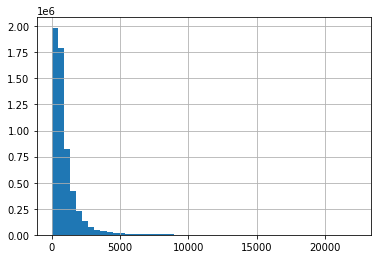

In [16]:
# Graph most of the durations. The durations are skewed left, informing us to use boxplots and medians going forward as metrics, rather than mean and z-scores
df_22[np.abs(stats.zscore(df_22["duration"].dt.total_seconds())) < 2]["duration"].dt.total_seconds().hist(bins=50)

# Analysis -- Descriptive Statistics

NOTE: The writing found in this section will differ from that in the final report. 

In this phase, we organize our data, identify trends and relationships, and perform calculations. These insights will be useful in answering the Business Question about what characterizes casual riders and member riders. We perform the following analyses: 

For each month, grouped by membership type, calculate:

1. Average and Median of Duration 
2. Average and Median of Duration by Membership Type Per Week Day
3. Bike Usage Frequency by Membership and Day of the Week
4. Bike Usage Frequency by Membership and Month of the Year 
5. Bike Usage Frequency by Membership and Time of Day
6. Proportion of membership type population by rideable_type (electric, classic, or docked)
 

**1. Average and Median of Duration** From the stats and boxplots, it is evident that casual riders are significantly more likely to have longer rides than member riders. There is still overlap between the two populations. 

Given these facts, in the effort to convert casual riders to members, it would be reasonable tailor advertisements geared toward both "short" and "long" riders. 

In [17]:
print(df_22[df_22["member_casual"] == "casual"]["duration"].describe())
print(df_22[df_22["member_casual"] == "member"]["duration"].describe())

# alternatively with a pivot table:
#pivot_1 = df_22.pivot_table(values=["duration"], index=["member_casual"], aggfunc={"duration": [np.median, np.mean]})
#print(pivot_1)

count                      2320268
mean     0 days 00:29:09.092635850
std      0 days 04:32:42.482020955
min                0 days 00:00:01
25%                0 days 00:07:20
50%                0 days 00:13:00
75%                0 days 00:24:06
max               28 days 17:47:15
Name: duration, dtype: object
count                      3343230
mean     0 days 00:12:42.898380009
std      0 days 00:28:48.422377466
min                0 days 00:00:01
25%                0 days 00:05:07
50%                0 days 00:08:50
75%                0 days 00:15:16
max                1 days 01:59:54
Name: duration, dtype: object


In [18]:
c_durations = df_22[df_22["member_casual"] == "casual"][["duration"]]
c_durations["duration"] = c_durations["duration"].dt.total_seconds() / 60

m_durations = df_22[df_22["member_casual"] == "member"][["duration"]]
m_durations["duration"] = m_durations["duration"].dt.total_seconds() / 60

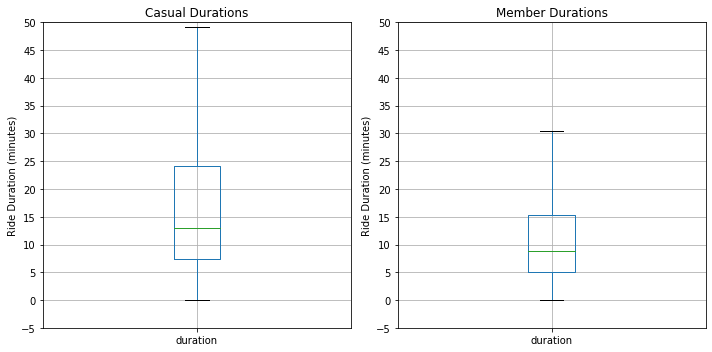

In [19]:
# Create two boxplots, one for casual and one for member
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

c_durations.boxplot(ax=axs[0], showfliers=False, grid=True, ylabel="Ride Duration (minutes)")
axs[0].set_title('Casual Durations')
axs[0].set_ylim(-5, 50)
axs[0].set_yticks(range(-5, 50 + 1, 5))


m_durations.boxplot(ax=axs[1], showfliers=False, grid=True, ylabel="Ride Duration (minutes)")
axs[1].set_title('Member Durations')
axs[1].set_ylim(-5, 50)
axs[1].set_yticks(range(-5, 50 + 1, 5))

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**2. Average and Median of Duration by Membership Type Per Week Day** 
* We have across all weekdays that casual riders are more likely to ride for a longer duration than membership riders. 
* The duration for membership riders on the weekdays is very consistent, while that of casual riders is comparatively more variable. 
* Both riders tend to have longer rides than the weekends and Friday than on the weekdays Monday through Thursday.  

These trends could be because casual riders ride mainly for recreation or getting to faraway places on Fridays and the weekends, and member riders use the bikes mainly to commute to work or school everyday. These hypotheses are further bolstered by the findings in the following sections 3 and 4. 

Administering a survey to both groups for their reasons for using the bikes would help clarify the exact reasons, but we believe it is safe to assume casual riders are more likely to ride for occasional recreation than as a consistent means of transportation. 

In [20]:
# TimeDelta object doesn't have a minutes attribute, so we circumvent that by dividing total seconds by 60
avg_ride_len_by_mem = df_22.groupby(by=["day_of_week", "member_casual"])["duration"].mean().reset_index()
avg_ride_len_by_mem["duration"] = round(avg_ride_len_by_mem["duration"].dt.total_seconds()/60, 2)
avg_ride_len_by_mem = avg_ride_len_by_mem.pivot(index="day_of_week", columns="member_casual", values="duration").reset_index().rename(columns={"casual":"casual mean duration (min)", "member":"member mean duration (min)"})

In [21]:
med_ride_len_by_mem = df_22.groupby(by=["day_of_week", "member_casual"])["duration"].median().reset_index()
med_ride_len_by_mem["duration"] = round(med_ride_len_by_mem["duration"].dt.total_seconds()/60, 2)
med_ride_len_by_mem = med_ride_len_by_mem.pivot(index="day_of_week", columns="member_casual", values="duration").reset_index().rename(columns={"casual":"casual median duration (min)", "member":"member median duration (min)"})

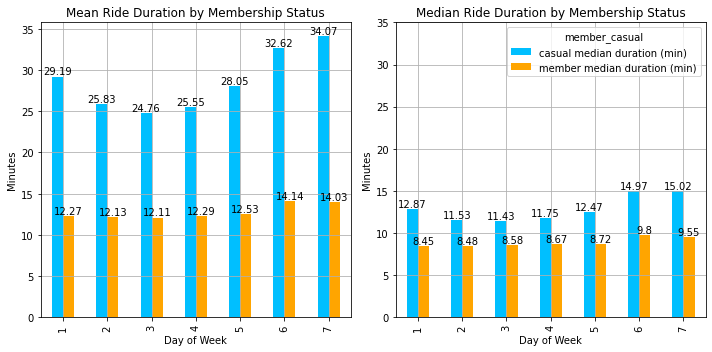

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
avg_ride_len_by_mem.plot(ax=axs[0], kind="bar", x="day_of_week", y=["casual mean duration (min)", "member mean duration (min)"], title="Mean Ride Duration by Membership Status", grid=True, xlabel="Day of Week", ylabel="Minutes", color=["deepskyblue", "orange"], legend=False)
axs[0].bar_label(axs[0].containers[0])
axs[0].bar_label(axs[0].containers[1])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

med_ride_len_by_mem.plot(ax=axs[1], kind="bar", x="day_of_week", y=["casual median duration (min)", "member median duration (min)"], title="Median Ride Duration by Membership Status", grid=True, xlabel="Day of Week", ylabel="Minutes", ylim=(0,35), color=["deepskyblue", "orange"])
axs[1].bar_label(axs[1].containers[0])
axs[1].bar_label(axs[1].containers[1])
#axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**3. Bike Usage Frequency by Day of the Week** We have that member riders are more likely to ride on weekdays with weekends having the lower number of rides, and that casual riders are the opposite -- they are more likely to ride on weekends than they are any given weekday. 

We hypothesize that member riders are more likely to use the bicycles to commute to work on the weekdays (Mon-Fri), and casual riders are more likely to use them for recreation on Fridays and weekends (Fri-Sun). 

-- this section can be combined with Section 2 tbh 

In [23]:
# Separating into the two membership groups
casuals = df_22[df_22["member_casual"] == "casual"]
members = df_22[df_22["member_casual"] == "member"]

Casual day_of_week rankings: day_of_week
6    472820
7    388755
5    334449
4    309076
1    277460
3    274156
2    263552
Name: count, dtype: int64
Member day_of_week rankings: day_of_week
4    531874
3    523497
2    518205
1    472999
5    466767
6    442955
7    386933
Name: count, dtype: int64


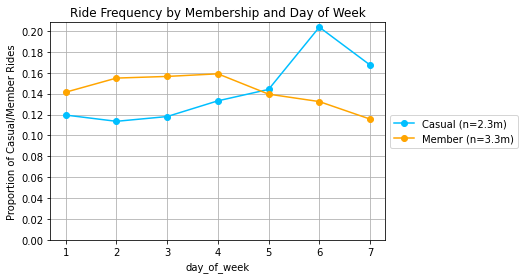

In [24]:
print("Casual day_of_week rankings:", casuals["day_of_week"].value_counts())
print("Member day_of_week rankings:", members["day_of_week"].value_counts())

# adapt the code from the monthly proportions. it's the same format

#casuals["day_of_week"].value_counts().reset_index().sort_values("day_of_week").reset_index(drop=True).plot(kind="bar")
#members["day_of_week"].value_counts().reset_index().sort_values("day_of_week").reset_index(drop=True).plot(kind="bar")

day_proportions = df_22.groupby(by=["member_casual", "day_of_week"])["ride_id"].count().reset_index().pivot(index="day_of_week", columns="member_casual", values="ride_id")
day_proportions["casual"] = day_proportions["casual"] / casuals.shape[0] 
day_proportions["member"] = day_proportions["member"] / members.shape[0] 
#month_proportions = month_proportions.rename(columns={"member_casual": "month"})

ax = day_proportions.plot(kind="line", grid=True, ylabel="Proportion of Casual/Member Rides", title="Ride Frequency by Membership and Day of Week", xticks=range(1,8), yticks=np.arange(0,0.22,0.02), color=["deepskyblue", "orange"], marker='o')
ax.legend(["Casual (n=2.3m)", "Member (n=3.3m)"], loc='center left', bbox_to_anchor=(1, 0.5))

**4. Bike Usage Frequency by Membership and Month of the Year**

<AxesSubplot:title={'center':'Member Ride Frequency Proportions by Month'}, xlabel='month', ylabel='Proportion of all Member Rides (n=3.3m)'>

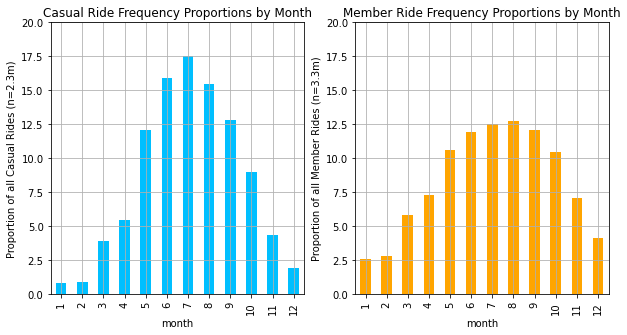

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

round(casuals.groupby(by=["month"])["ride_id"].count()/casuals.shape[0] * 100, 2).plot(ax=axs[0], kind="bar", ylim=(0,20), grid=True, title="Casual Ride Frequency Proportions by Month", ylabel="Proportion of all Casual Rides (n=2.3m)", color=["deepskyblue"])

round(members.groupby(by=["month"])["ride_id"].count()/members.shape[0] * 100, 2).plot(ax=axs[1], kind="bar", ylim=(0,20), grid=True, title="Member Ride Frequency Proportions by Month", ylabel="Proportion of all Member Rides (n=3.3m)", color=["orange"])

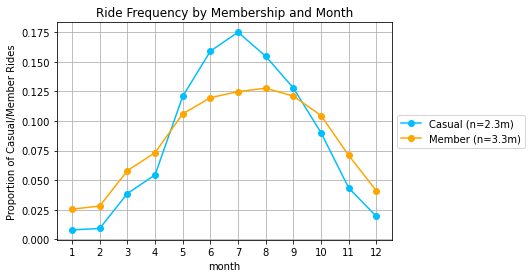

In [26]:
month_proportions = df_22.groupby(by=["member_casual", "month"])["ride_id"].count().reset_index().pivot(index="month", columns="member_casual", values="ride_id")
month_proportions["casual"] = month_proportions["casual"] / casuals.shape[0] 
month_proportions["member"] = month_proportions["member"] / members.shape[0] 
#month_proportions = month_proportions.rename(columns={"member_casual": "month"})

ax = month_proportions.plot(kind="line", grid=True, ylabel="Proportion of Casual/Member Rides", title="Ride Frequency by Membership and Month", xticks=range(1,13), color=["deepskyblue", "orange"], marker='o')
ax.legend(["Casual (n=2.3m)", "Member (n=3.3m)"], loc='center left', bbox_to_anchor=(1, 0.5))

**5. Bike Usage Frequency by Membership and Time of Day** We notice that the ride frequency for members significantly surpass that of casuals from 5am to 9am, and similarly during 4pm to 5pm. These are the usual times when people get off work, further validating the hypothesis that members are more likely to ride to commute to and from work. 

What is also interesting is that the graph of casual rides does not differ much from that of members -- having a steady rise from the morning, peaking at 5pm, and dropping off. We are unsure of why this trend is as such, but this similarity shows that our casual audience is more primed than previously inferred to purchase an membership to commute to and from work. 

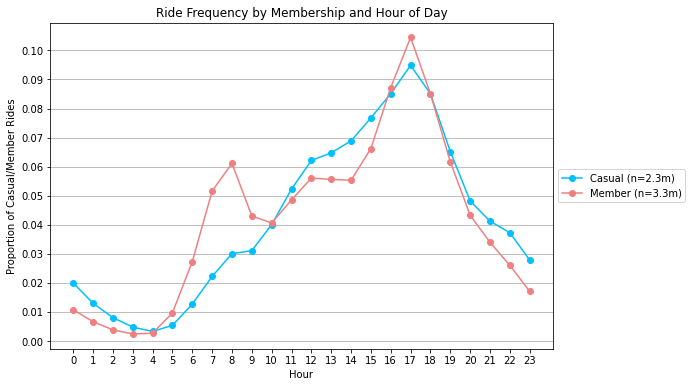

In [27]:
hour_freqs = df_22.groupby(by=["member_casual", "hour"])["ride_id"].count().to_frame().reset_index()
hour_freqs = hour_freqs.pivot(index="hour", columns="member_casual", values="ride_id")
hour_freqs["casual"] = hour_freqs["casual"] / casuals.shape[0] 
hour_freqs["member"] = hour_freqs["member"] / members.shape[0] 
ax = hour_freqs.plot(kind="line", figsize=(9,6), xticks=range(0,24), yticks=np.arange(0, 0.11, step=0.01), xlabel="Hour", ylabel="Proportion of Casual/Member Rides", color=["deepskyblue", "lightcoral"], marker='o', title="Ride Frequency by Membership and Hour of Day")
ax.yaxis.grid(True)
ax.legend(["Casual (n=2.3m)", "Member (n=3.3m)"], loc='center left', bbox_to_anchor=(1, 0.5));

**6. Ride Type Composition by membership status** The compositions are roughly the same, with casual members having a slight preference for electric bikes. The similarity between the compositions will not   

In [28]:
round(casuals["rideable_type"].value_counts()/casuals.shape[0] * 100, 2), round(members["rideable_type"].value_counts()/members.shape[0] * 100, 2).sort_index(ascending=False)
# pie chart

(rideable_type
 electric_bike   53.960
 classic_bike    38.390
 docked_bike      7.640
 Name: count, dtype: float64,
 rideable_type
 electric_bike   48.900
 classic_bike    51.100
 Name: count, dtype: float64)

<AxesSubplot:title={'center':'Composition of Bike Types of Member Riders'}>

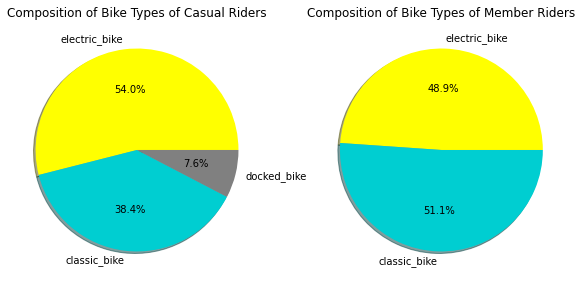

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

round(casuals["rideable_type"].value_counts()/casuals.shape[0] * 100, 2).plot(ax=axs[0], kind="pie", title="Composition of Bike Types of Casual Riders", ylabel="", legend=False, autopct='%1.1f%%', shadow=True, startangle=0, colors=["yellow", "darkturquoise", "gray"])

round(members["rideable_type"].value_counts()/members.shape[0] * 100, 2).sort_index(ascending=False).plot(ax=axs[1], kind="pie", title="Composition of Bike Types of Member Riders", ylabel="", legend=False, autopct='%1.1f%%', shadow=True, startangle=0, colors=["yellow", "darkturquoise"])